In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
pd.set_option('chained',None)

In [2]:
df = pd.read_csv('stud_math.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [4]:
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# делаем копию исходного датафрейма и поменяем названия столбцов на более понятные
students_stat = df.copy()
students_stat = students_stat.rename(columns={'sex': 'students_gender', 'age': 'students_age',
                              'famsize': 'family_size', 'Pstatus': 'parents_status',
                              'Medu': 'mother_education', 'Fedu': 'father_education',
                              'Mjob': 'mother_job', 'Fjob': 'father_job', 'reason': 'reason_school_choosing',
                              'traveltime': 'travel_time', 'studytime': 'study_time',
                              'schoolsup': 'school_educational_support', 'famsup': 'family_educational_support',
                              'paid': 'additional_paid_lessons', 'activities': 'additional_extracurricular_activities',
                              'studytime, granular': 'studytime_granular', 'higher': 'get_higher_education',
                              'romantic': 'in_romantic_relationship', 'famrel': 'family_relationships',
                              'freetime': 'free_time', 'goout': 'go_out', 'health': 'health_status',
                              'score': 'state_exam_scores'})
students_stat

,school,students_gender,students_age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason_school_choosing,guardian,travel_time,study_time,failures,school_educational_support,family_educational_support,additional_paid_lessons,additional_extracurricular_activities,nursery,studytime_granular,get_higher_education,internet,in_romantic_relationship,family_relationships,free_time,go_out,health_status,absences,state_exam_scores
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [6]:
# Проверим корректность названий
students_stat.columns

Index(['school', 'students_gender', 'students_age', 'address', 'family_size',
       'parents_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'reason_school_choosing', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_educational_support',
       'family_educational_support', 'additional_paid_lessons',
       'additional_extracurricular_activities', 'nursery',
       'studytime_granular', 'get_higher_education', 'internet',
       'in_romantic_relationship', 'family_relationships', 'free_time',
       'go_out', 'health_status', 'absences', 'state_exam_scores'],
      dtype='object')

# Формулы для расчета

In [7]:
def IQR(x):
    '''Функция для расчета  межквартильного размаха'''
    return x.quantile(0.75) - x.quantile(0.25)

def perc25(x):
    '''Функция для расчета нижнего квартиля'''
    return x.quantile(0.25)

def perc75(x):
    '''Функция для расчета верхнего квартиля'''
    return x.quantile(0.75)

def outlier_low(x):
    '''Функция для расчета границы нижнего выброса'''
    return perc25(x) - 1.5*IQR(x)

def outlier_high(x):
    '''Функция для расчета границы верхнего выброса'''
    return perc75(x) + 1.5*IQR(x)

def change_nan(x):
    '''Функция замены NaN на None'''
    if pd.isnull(x):
        return None
    else:
        return x
    
def change_median(x):
    '''Функция замены NaN на медиану'''    
    if pd.isnull(x):
        return x.fillna(x.median(skipna = True)[0])
    else:
        return x
    
def change_mode(x):
    '''Функция замены NaN на моду'''
    if pd.isnull(x):
        x.fillna(' ')
        return x
    else:
        return x
    
def change_mode2(x):
    x.fillna(' ')
    n = x.isna()
    m1 = n & (students_stat.parents_status == 'A')
    m2 = n & (students_stat.parents_status == 'T')
    np.select([m1,m2], ['LE3','GT3'], default = students_stat.family_size)


# 1. Анализ данных в столбце 'school'

In [8]:
# Посмотрим какое количество учеников учится в какой школе, и есть ли незаполненные ячейки
pd.DataFrame(students_stat.school.value_counts())

,school
GP,349
MS,46


In [9]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [10]:
students_stat.groupby(['school'])['state_exam_scores'].aggregate('mean')

school
GP    52.630814
MS    49.444444
Name: state_exam_scores, dtype: float64

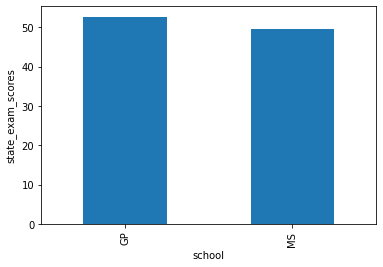

In [11]:
students_stat.groupby('school')['state_exam_scores'].mean().plot(kind='bar') 
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

По оценке вляния школы на баллы по госэкзамену по математике в среднем одинаковые, можно предположить, что данный столбец большую ценности для анализа не имеет.

# 2. Анализ данных в столбце 'students_gender'

In [12]:
# Посмотрим какое количество парней и девушек в датафрейме ('F' - женский, 'M' - мужской)
pd.DataFrame(students_stat.students_gender.value_counts())

,students_gender
F,208
M,187


In [13]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['students_gender']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   students_gender  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [14]:
students_stat.groupby(['students_gender'])['state_exam_scores'].aggregate('mean')

students_gender
F    50.098039
M    54.648649
Name: state_exam_scores, dtype: float64

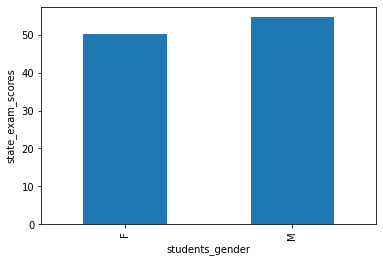

In [15]:
students_stat.groupby('school')['state_exam_scores'].mean().plot(kind='bar') 
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Гендерный признак влияет на баллы по госэкзамену по математике в среднем одинаково, можно предположить, что данный столбец большую ценности для анализа не имеет.

# 3. Анализ данных в столбце 'students_age'

In [16]:
# Посмотрим соотношение возраста учеников
pd.DataFrame(students_stat.students_age.value_counts())

,students_age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [17]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['students_age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   students_age  395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: students_age, dtype: float64

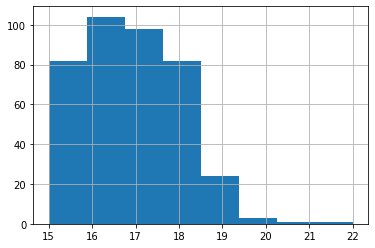

In [18]:
# Посмотрим распределение возраста студентов на гистограмме на наличие аномалий и выбросов
students_stat.students_age.hist(bins = 8)
students_stat.students_age.describe()

Видим, что основное распределение лежит между 15 и 19 годами и есть потенциальные выбросы свыше 19 лет.

<AxesSubplot:xlabel='students_age'>

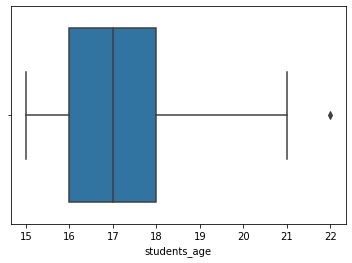

In [19]:
# Посмотрим наличие выбросов на графике Box plot
sns.boxplot(x = 'students_age', data = students_stat)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


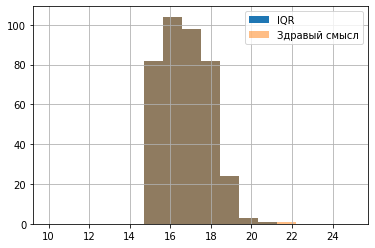

In [20]:
# Вычислим выбросы по формулам
perc25_stud_age = perc25(students_stat.students_age)
perc75_stud_age = perc75(students_stat.students_age)
IQR_stud_age = IQR(students_stat.students_age)

print('25-й перцентиль: {},'.format(perc25_stud_age),
      '75-й перцентиль: {},'.format(perc75_stud_age),
      "IQR: {}, ".format(IQR_stud_age),
      "Границы выбросов: [{f}, {l}].".format(f=perc25_stud_age - 1.5*IQR_stud_age, 
                                             l=perc75_stud_age + 1.5*IQR_stud_age))

students_stat.students_age.loc[students_stat.students_age.between(
    outlier_low(students_stat.students_age),
    outlier_high(students_stat.students_age))].hist(bins=16, range=(10, 25), label='IQR')

students_stat.students_age.loc[students_stat.students_age <= 25].hist(
    alpha=0.5, bins=16, range=(10, 25), label='Здравый смысл')

plt.legend()

In [21]:
# Удалим выбросы
students_stat = students_stat.loc[students_stat.students_age.between(outlier_low(students_stat.students_age),
                                                                     outlier_high(students_stat.students_age))]

In [22]:
students_stat.groupby(['students_age'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['students_age'])['state_exam_scores'].value_counts()

students_age
15    56.280488
16    55.194175
17    51.377551
18    48.312500
19    40.238095
20    70.000000
21    35.000000
Name: state_exam_scores, dtype: float64

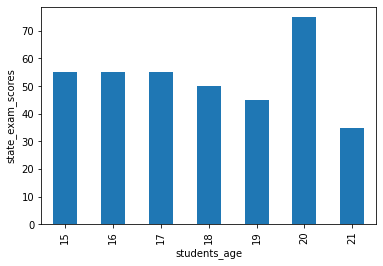

In [23]:
students_stat.groupby('students_age')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

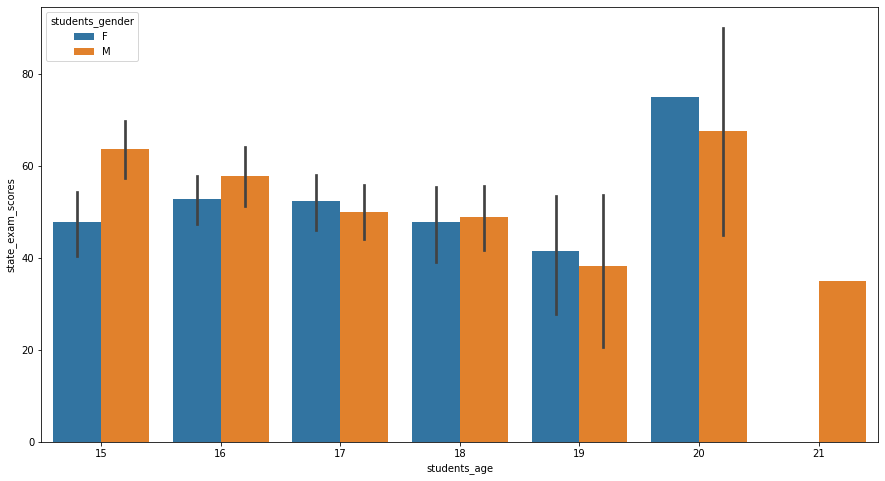

In [24]:
plt.figure(figsize=(15, 8))
sns.barplot(x='students_age', y='state_exam_scores', hue='students_gender', data=students_stat);

Из диаграмм видно, что с увеличением возраста падает средняя успеваемость, однако в возрасте 20 лет ученики имеют самый высокий средний бал, при условии что он высчитывается всего из 3 значений.

# 4. Анализ данных в столбце 'address'

In [25]:
# Посмотрим соотношение учеников которые живут в городе и за городом ('U' - городской, 'R' - за городом)
pd.DataFrame(students_stat.address.value_counts())

,address
U,294
R,83


In [26]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [27]:
# Посмотрим уникальные значения в столбце
print(students_stat.address.unique())

['U' nan 'R']


In [28]:
# В колонке есть 17 значений "NaN", заменим их на моду   
students_stat.address = students_stat.address.fillna(students_stat.address.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.address.unique())

['U' 'R']


In [29]:
students_stat.groupby(['address'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['students_age'])['state_exam_scores'].value_counts()

address
R    46.927711
U    53.754098
Name: state_exam_scores, dtype: float64

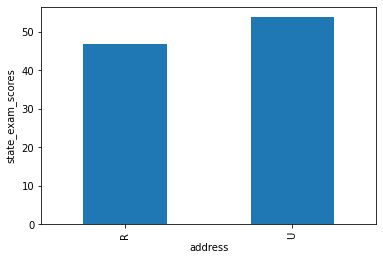

In [30]:
students_stat.groupby('address')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Из диаграммы видно, что успеваемость учеников из города немного выше.

# 5. Анализ данных в столбце 'parents_status'

In [31]:
'''
Рассмотри сперва этот столюец, т.к. от него будет браться условие для family_size. 
Посмотрим статус совместного проживания родителей ('T' - живут вместе 'A' - раздельно)
'''
pd.DataFrame(students_stat.parents_status.value_counts())

,parents_status
T,313
A,36


In [32]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['parents_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   parents_status  349 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [70]:
# В колонке есть 45 значений "NaN", заменим их на моду   
students_stat.parents_status = students_stat.parents_status.fillna(students_stat.parents_status.mode()[0])

# Посмотрим уникальные значения в столбце
print(students_stat.parents_status.unique())

['A' 'T']


In [71]:
print(students_stat.parents_status.value_counts())

T    357
A     36
Name: parents_status, dtype: int64


In [72]:
students_stat.groupby(['parents_status'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['students_age'])['state_exam_scores'].value_counts()

parents_status
A    55.0
T    55.0
Name: state_exam_scores, dtype: float64

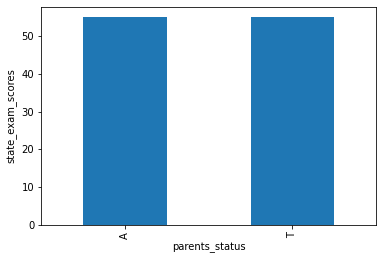

In [73]:
students_stat.groupby('parents_status')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, у которых родители живут раздельно успеваемость такая же, как и у учеников из полных семей. Данный столбец скорее всего не пригодиться для анализа.

# 6. Анализ данных в столбце 'family_size'

In [37]:
# Посмотрим соотношение размеров семей учеников ('LE3' <= 3, 'GT3' >3)
pd.DataFrame(students_stat.family_size.value_counts())

,family_size
GT3,260
LE3,107


In [38]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['family_size']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_size  367 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [39]:
'''
В колонке есть 27 значений "Nan", заменим их на моду 'GT3' >3 при условии, 
что parents_status будет иметь значение 'T' - живут вместе, иначе
т.к. 'LE3' <= 3, т.к. в семье где родители живут раздельно скорее всего >= 3 человека.
Для столбцов, где оба значения NaN, подставим моду - 'GT3'
'''
n = students_stat.family_size.isna()
m1 = n & (students_stat.parents_status == 'A')
m2 = n & (students_stat.parents_status == 'T')
m3 = n & (students_stat.parents_status.isna())
students_stat.family_size = np.select([m1,m2,m3], ['LE3','GT3','GT3'], default = students_stat.family_size)

# Проверим уникальеность значений в колонке после замены
print(students_stat.family_size.unique())

['LE3' 'GT3']


In [40]:
print(students_stat.family_size.value_counts())

GT3    284
LE3    110
Name: family_size, dtype: int64


In [41]:
students_stat.groupby(['family_size'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['students_age'])['state_exam_scores'].value_counts()

family_size
GT3    55.0
LE3    55.0
Name: state_exam_scores, dtype: float64

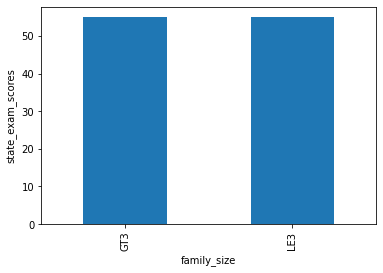

In [42]:
students_stat.groupby('family_size')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, у которых родители живут раздельно успеваемость такая же, как и у учеников из полных семей. Данный столбец скорее всего не пригодиться для анализа.

# 7. Анализ данных в столбце 'mother_education'

In [43]:
'''
Посмотрим статистику по образованиям матерей 
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
'''
pd.DataFrame(students_stat.mother_education.value_counts())

,mother_education
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


In [44]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['mother_education']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mother_education  391 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


In [45]:
# Посмотрим уникальные значения в столбце
print(students_stat.mother_education.unique())

[ 4.  1.  3.  2. nan  0.]


In [46]:
# В колонке есть 3 значения "NaN", заменим их на медиану
students_stat['mother_education'] = students_stat['mother_education'].fillna(
    students_stat['mother_education'].median(skipna=True))

# Проверим уникальеность значений в колонке после замены
print(students_stat.mother_education.unique())

[4. 1. 3. 2. 0.]


<AxesSubplot:xlabel='mother_education'>

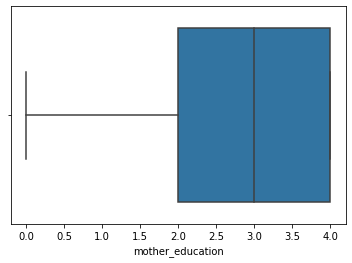

In [47]:
# Посмотрим наличие выбросов на графике Box plot
sns.boxplot(x = 'mother_education', data = students_stat)

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


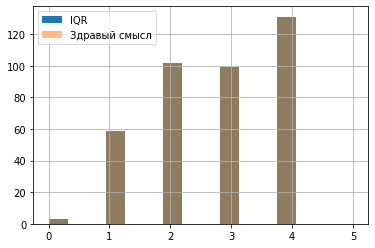

In [48]:
# Вычислим выбросы по формулам
perc25_moth_edu = perc25(students_stat.mother_education)
perc75_moth_edu = perc75(students_stat.mother_education)
IQR_moth_edu = IQR(students_stat.mother_education)

print('25-й перцентиль: {},'.format(perc25_moth_edu),
      '75-й перцентиль: {},'.format(perc75_moth_edu),
      "IQR: {}, ".format(IQR_moth_edu),
      "Границы выбросов: [{f}, {l}].".format(f=perc25_moth_edu - 1.5*IQR_moth_edu, 
                                             l=perc75_moth_edu + 1.5*IQR_moth_edu))

students_stat.mother_education.loc[students_stat.mother_education.between(
    outlier_low(students_stat.mother_education),
    outlier_high(students_stat.mother_education))].hist(bins=16, range=(0, 5), label='IQR')

students_stat.mother_education.loc[students_stat.mother_education <= 150].hist(
    alpha=0.5, bins=16, range=(0, 5), label='Здравый смысл')

plt.legend()

В столбце 'mother_education' выбросов нет

In [49]:
students_stat.groupby(['mother_education'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['mother_education'])['state_exam_scores'].value_counts()

mother_education
0.0    65.000000
1.0    43.125000
2.0    49.600000
3.0    51.173469
4.0    58.816794
Name: state_exam_scores, dtype: float64

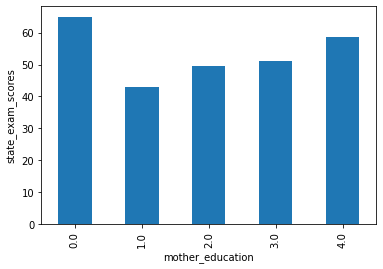

In [50]:
students_stat.groupby('mother_education')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Самая высокая успеваемость у учеников, у которых матери без образования и у которых высшее образование.

# 8. Анализ данных в столбце 'father_education'

In [51]:
'''
Посмотрим статистику по образованиям отцов 
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
'''
pd.DataFrame(students_stat.father_education.value_counts())

,father_education
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


In [52]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['father_education']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   father_education  370 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


In [53]:
# Посмотрим уникальные значения в столбце
print(students_stat.father_education.unique())

[ 4.  1.  2.  3. 40. nan  0.]


In [54]:
# В колонке есть 3 значения "NaN", заменим их на медиану
students_stat['father_education'] = students_stat['father_education'].fillna(
    math.ceil(students_stat['father_education'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.father_education.unique())

[ 4.  1.  2.  3. 40.  0.]


<AxesSubplot:xlabel='father_education'>

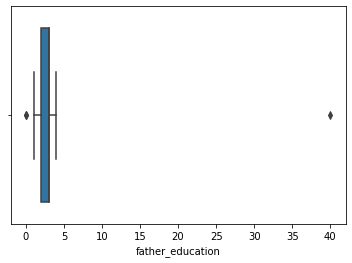

In [55]:
# Посмотрим наличие выбросов на графике Box plot
sns.boxplot(x = 'father_education', data = students_stat)

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


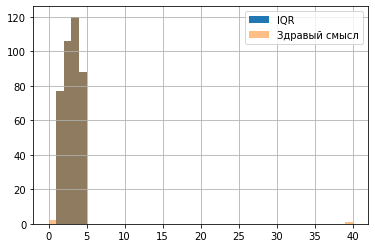

In [56]:
# Вычислим выбросы по формулам
perc25_moth_edu = perc25(students_stat.father_education)
perc75_moth_edu = perc75(students_stat.father_education)
IQR_moth_edu = IQR(students_stat.father_education)

print('25-й перцентиль: {},'.format(perc25_moth_edu),
      '75-й перцентиль: {},'.format(perc75_moth_edu),
      "IQR: {}, ".format(IQR_moth_edu),
      "Границы выбросов: [{f}, {l}].".format(f=perc25_moth_edu - 1.5*IQR_moth_edu, 
                                             l=perc75_moth_edu + 1.5*IQR_moth_edu))

students_stat.father_education.loc[students_stat.father_education.between(
    outlier_low(students_stat.father_education),
    outlier_high(students_stat.father_education))].hist(bins=40, range=(0, 40), label='IQR')

students_stat.father_education.loc[students_stat.father_education <= 150].hist(
    alpha=0.5, bins=40, range=(0, 40), label='Здравый смысл')

plt.legend()

In [57]:
# Удалим выбросы только верхний выброс, т.к. по нижнему информацию нужно проанализировать
students_stat = students_stat.loc[students_stat.father_education < 40]

In [58]:
students_stat.groupby(['father_education'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['father_education'])['state_exam_scores'].value_counts()

father_education
0.0    65.000000
1.0    46.418919
2.0    51.761905
3.0    53.644068
4.0    55.681818
Name: state_exam_scores, dtype: float64

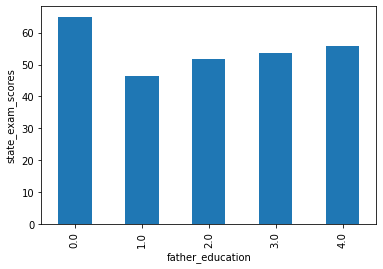

In [59]:
students_stat.groupby('father_education')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Самая высокая успеваемость у учеников, у которых jnws без образования и у которых высшее образование.

# 9. Анализ данных в столбце 'mother_job'

In [60]:
'''
Посмотрим статистику по местам работы матерей ('teacher' - учитель, 'health' - сфера здравоохранения, 
'services' - гос служба, 'at_home' - не работает, 'other' - другое)
'''
pd.DataFrame(students_stat.mother_job.value_counts())

,mother_job
other,133
services,96
at_home,58
teacher,55
health,32


In [61]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['mother_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mother_job  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [62]:
# Посмотрим уникальные значения в столбце
print(students_stat.mother_job.unique())

['at_home' 'health' 'other' 'services' 'teacher' nan]


In [75]:
# В колонке есть 19 значений "NaN", заменим их на моду   
students_stat.mother_job = students_stat.mother_job.fillna(students_stat.mother_job.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.mother_job.unique())

['at_home' 'health' 'other' 'services' 'teacher']


In [76]:
print(students_stat.mother_job.value_counts())

other       152
services     96
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64


In [77]:
students_stat.groupby(['mother_job'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['mother_job'])['state_exam_scores'].value_counts()

mother_job
at_home     45.689655
health      60.625000
other       50.273973
services    54.843750
teacher     55.181818
Name: state_exam_scores, dtype: float64

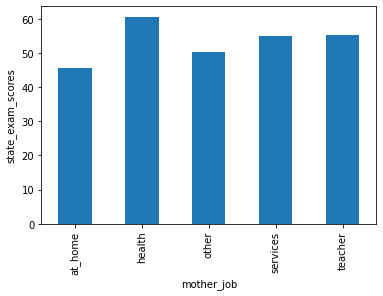

In [78]:
students_stat.groupby('mother_job')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

У учеников, матери которых работают в сфере здравоохранения показатели экзамена немного лучше, чем у остальных.

# 10. Анализ данных в столбце 'father_job'

In [65]:
'''
Посмотрим статистику по местам работы отцов ('teacher' - учитель, 'health' - сфера здравоохранения, 
'services' - гос служба, 'at_home' - не работает, 'other' - другое)
'''
pd.DataFrame(students_stat.father_job.value_counts())

,father_job
other,196
services,101
teacher,29
at_home,16
health,15


In [66]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['father_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   father_job  357 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [67]:
# Посмотрим уникальные значения в столбце
print(students_stat.father_job.unique())

['teacher' 'other' nan 'health' 'services' 'at_home']


In [83]:
# В колонке есть 34 значений "NaN", заменим их на моду   
students_stat.father_job = students_stat.father_job.fillna(students_stat.father_job.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.father_job.unique())

['teacher' 'other' 'health' 'services' 'at_home']


In [85]:
students_stat.groupby(['father_job'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['father_job'])['state_exam_scores'].value_counts()

father_job
at_home     51.875000
health      55.666667
other       51.855895
services    50.561224
teacher     59.827586
Name: state_exam_scores, dtype: float64

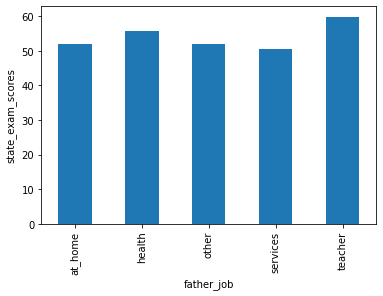

In [86]:
students_stat.groupby('father_job')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

У учеников, отцы которых работают в сфере учителями, показатели экзамена немного лучше, чем у остальных.

# 11. Анализ данных в столбце 'reason_school_choosing'

In [88]:
'''
Посмотрим статистику по причине выбора школы 
('home' - близость к дому, 'reputation' - репутация школы, 
'course' - образовательная программа, 'other' - другое)
'''
pd.DataFrame(students_stat.reason_school_choosing.value_counts())

,reason_school_choosing
course,137
home,104
reputation,102
other,33


In [89]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['reason_school_choosing']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   reason_school_choosing  376 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [90]:
# Посмотрим уникальные значения в столбце
print(students_stat.reason_school_choosing.unique())

['course' 'other' 'home' 'reputation' nan]


In [99]:
students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].value_counts()

reason_school_choosing
course        50.0
home          55.0
other         55.0
reputation    55.0
Name: state_exam_scores, dtype: float64

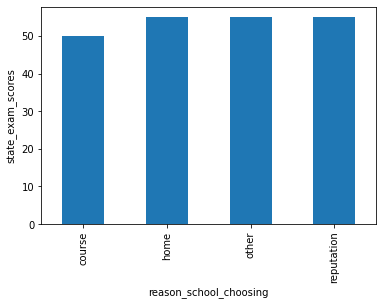

In [98]:
students_stat.groupby('reason_school_choosing')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Причина выбора школы в большой мере на успеваемость не влияет, данный столбец для анализа скорее всего не понадобиться.

# 12. Анализ данных в столбце 'guardian'

In [94]:
'''
Посмотрим статистику опекунства ('mother' - мать, 'father' - отец, 'other' - другое)
'''
pd.DataFrame(students_stat.guardian.value_counts())

,guardian
mother,249
father,85
other,28


In [95]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [96]:
# Посмотрим уникальные значения в столбце
print(students_stat.guardian.unique())

['mother' 'father' 'other' nan]


In [101]:
students_stat.groupby(['guardian'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].value_counts()

guardian
father    53.352941
mother    52.651822
other     45.625000
Name: state_exam_scores, dtype: float64

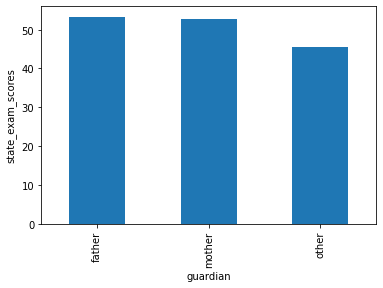

In [103]:
students_stat.groupby('guardian')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, у которых опекунами является мать или отец, учаться лучше. Скорее всего для анализа данный столбец не пригодиться. 

# 13. Анализ данных в столбце 'travel_time'

In [112]:
'''
Посмотрим статистику времни в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
'''
pd.DataFrame(students_stat.travel_time.value_counts())

,travel_time
1.0,241
2.0,96
3.0,21
4.0,7


In [106]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['travel_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  365 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


In [107]:
# Посмотрим уникальные значения в столбце
print(students_stat.travel_time.unique())

[ 2.  1.  3. nan  4.]


In [113]:
# В колонке есть 28 значений "NaN", заменим их на моду   
students_stat.travel_time = students_stat.travel_time.fillna(students_stat.travel_time.mode()[0])

# Посмотрим уникальные значения в столбце
print(students_stat.travel_time.unique())

[2. 1. 3. 4.]


In [114]:
students_stat.groupby(['travel_time'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].value_counts()

travel_time
1.0    53.007519
2.0    51.755319
3.0    45.750000
4.0    50.000000
Name: state_exam_scores, dtype: float64

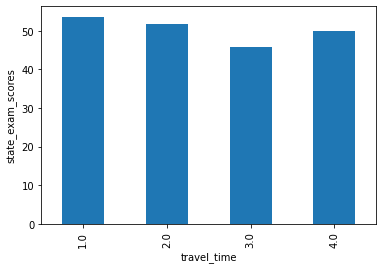

In [111]:
students_stat.groupby('travel_time')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, которые живут ближе к школе, имеют более высой бал за экзамен

# 14. Анализ данных в столбце 'study_time'

In [120]:
'''
Посмотрим статистику времни на учёбу помимо школы в неделю 
(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
'''
pd.DataFrame(students_stat.study_time.value_counts())

,study_time
2.0,194
1.0,102
3.0,63
4.0,27


In [116]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['study_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  386 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


In [117]:
# Посмотрим уникальные значения в столбце
print(students_stat.study_time.unique())

[ 2.  3.  1. nan  4.]


In [125]:
# В колонке есть 7 значений "NaN", заменим их на медиану
students_stat['study_time'] = students_stat['study_time'].fillna(
    math.ceil(students_stat['study_time'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.study_time.unique())

[2. 3. 1. 4.]


In [126]:
students_stat.groupby(['study_time'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].value_counts()

study_time
1.0    50.0
2.0    55.0
3.0    57.5
4.0    60.0
Name: state_exam_scores, dtype: float64

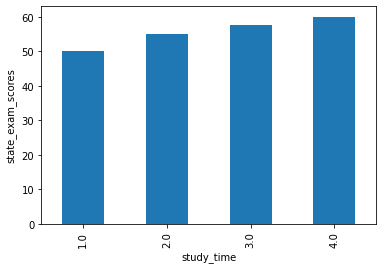

In [127]:
students_stat.groupby('study_time')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, которые тратят больше 5 часов в неделю, имеют более высокий балл на экзамене.

# 15. Анализ данных в столбце 'failures'

In [128]:
'''
Посмотрим количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
'''
pd.DataFrame(students_stat.failures.value_counts())

,failures
0.0,292
1.0,49
2.0,16
3.0,14


In [129]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  371 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


In [130]:
# Посмотрим уникальные значения в столбце
print(students_stat.failures.unique())

[ 0.  3. nan  2.  1.]


In [142]:
# В колонке есть 22 значения "NaN", заменим их на None
students_stat.study_time = students_stat.study_time.apply(change_nan)

# Проверим уникальеность значений в колонке после замены
print(students_stat.study_time.unique())

[2. 3. 1. 4.]


In [143]:
students_stat.groupby(['failures'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

failures
0.0    55.0
1.0    42.5
2.0    40.0
3.0    35.0
Name: state_exam_scores, dtype: float64

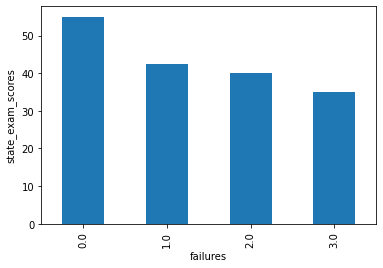

In [133]:
students_stat.groupby('failures')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

### Ученики,у которых не было внеучебных неудач, имеют баллы за экзамен намного выше. На основе данного столбца можно строить дальнейший анализ.

# 16. Анализ данных в столбце 'school_educational_support'

In [134]:
'''
Посмотрим статистику по дополнительной образовательной поддержке (yes или no)
'''
pd.DataFrame(students_stat.school_educational_support.value_counts())

,school_educational_support
no,333
yes,51


In [137]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['school_educational_support']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   school_educational_support  384 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


In [138]:
# Посмотрим уникальные значения в столбце
print(students_stat.school_educational_support.unique())

['yes' 'no' nan]


In [149]:
students_stat.groupby(['school_educational_support'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

school_educational_support
no     55.0
yes    50.0
Name: state_exam_scores, dtype: float64

In [150]:
# Посмотрим на соотношение поддержки в зависимости от школы
students_stat.groupby(['school_educational_support'])['school'].value_counts()
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

school_educational_support  school
no                          GP        289
                            MS         44
yes                         GP         51
Name: school, dtype: int64

In [171]:
'''
Поддержка есть только в школе GP, заполним недостающие данные по принципу, 
если школа GP, то есть поддержка, в остальных случаях нет
'''
n = students_stat.school_educational_support.isna()
m1 = n & (students_stat.school == 'GP')
m2 = n & (students_stat.school == 'MS')
m3 = n & (students_stat.school.isna())
students_stat.school_educational_support = np.select([m1, m2, m3], ['yes', 'no', 'no'],
                                                     default=students_stat.school_educational_support)
# Посмотрим уникальные значения в столбце после замены
print(f'{students_stat.school_educational_support.unique()},\n'
      f'{students_stat.school_educational_support.value_counts()}')

['yes' 'no'],
no     335
yes     58
Name: school_educational_support, dtype: int64


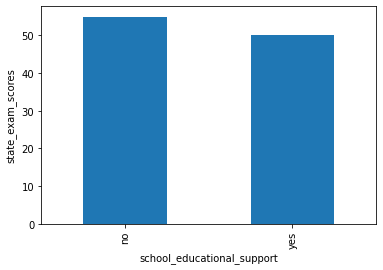

In [172]:
students_stat.groupby('school_educational_support')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Странно, но из данного датафрейма видно, что ученики без дополнительного образования имеют более высший балл за экзамен.

# 17. Анализ данных в столбце 'family_educational_support'

In [174]:
'''
Посмотрим статистику по семейной образовательной поддержке (yes или no)
'''
pd.DataFrame(students_stat.family_educational_support.value_counts())

,family_educational_support
yes,218
no,136


In [175]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['family_educational_support']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   family_educational_support  354 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


In [176]:
# Посмотрим уникальные значения в столбце
print(students_stat.family_educational_support.unique())

['no' 'yes' nan]


In [180]:
# В колонке есть 39 значений "NaN", заменим их на None
students_stat.family_educational_support = students_stat.family_educational_support.apply(change_nan)

# Проверим уникальеность значений в колонке после замены
print(students_stat.family_educational_support.unique())

['no' 'yes' None]


In [190]:
students_stat.groupby(['family_educational_support'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

family_educational_support
no     52.164179
yes    51.674419
Name: state_exam_scores, dtype: float64

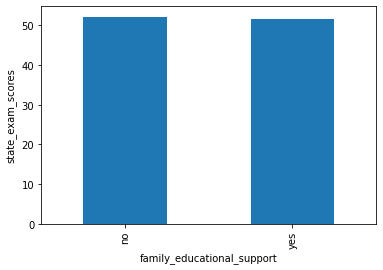

In [191]:
students_stat.groupby('family_educational_support')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Занчения по успеваемости равны для семей с поддержкой и без, одинаково. Скорее всего для анализа данный столбец не пригодиться. 

# 18. Анализ данных в столбце 'additional_paid_lessons'

In [183]:
'''
Посмотрим статистику по дополнительным платным занятиям по математике (yes или no)
'''
pd.DataFrame(students_stat.additional_paid_lessons.value_counts())

,additional_paid_lessons
no,198
yes,155


In [184]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['additional_paid_lessons']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   additional_paid_lessons  353 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


In [185]:
# Посмотрим уникальные значения в столбце
print(students_stat.additional_paid_lessons.unique())

['no' nan 'yes']


In [188]:
# В колонке есть 39 значений "NaN", заменим их на None
students_stat.additional_paid_lessons = students_stat.additional_paid_lessons.apply(change_nan)

# Проверим уникальеность значений в колонке после замены
print(students_stat.additional_paid_lessons.unique())

['no' None 'yes']


In [189]:
students_stat.groupby(['additional_paid_lessons'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

additional_paid_lessons
no     50.358974
yes    55.000000
Name: state_exam_scores, dtype: float64

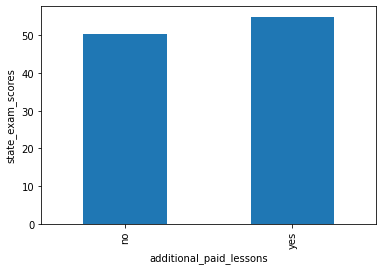

In [192]:
students_stat.groupby('additional_paid_lessons')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики с дополнительными платными занятиями имеют более высокий бол по экзамену.

# 19. Анализ данных в столбце 'additional_extracurricular_activities'

In [193]:
'''
Посмотрим статистику по дополнительным внеучебным занятиям (yes или no)
'''
pd.DataFrame(students_stat.additional_extracurricular_activities.value_counts())

,additional_extracurricular_activities
yes,194
no,185


In [194]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['additional_extracurricular_activities']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   additional_extracurricular_activities  379 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


In [195]:
# Посмотрим уникальные значения в столбце
print(students_stat.additional_extracurricular_activities.unique())

['no' 'yes' nan]


In [200]:
# В колонке есть 39 значений "NaN", заменим их на None
students_stat.additional_extracurricular_activities = students_stat.additional_extracurricular_activities.apply(change_nan)

# Проверим уникальеность значений в колонке после замены
print(students_stat.additional_extracurricular_activities.unique())

['no' 'yes' None]


In [201]:
students_stat.groupby(['additional_extracurricular_activities'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

additional_extracurricular_activities
no     52.252747
yes    52.643979
Name: state_exam_scores, dtype: float64

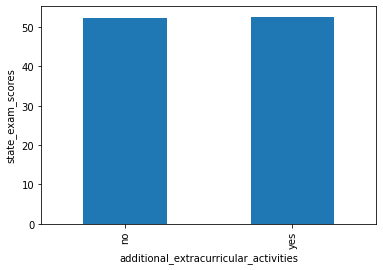

In [202]:
students_stat.groupby('additional_extracurricular_activities')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Занчения по успеваемости равны для учеников с дополнительными внеучебными занятиями и без, одинаково. Скорее всего для анализа данный столбец не пригодиться.

# 20. Анализ данных в столбце 'nursery'

In [203]:
'''
Посмотрим статистику по посещениям детского сада (yes или no)
'''
pd.DataFrame(students_stat.nursery.value_counts())

,nursery
yes,299
no,78


In [204]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  377 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


In [205]:
# Посмотрим уникальные значения в столбце
print(students_stat.nursery.unique())

['yes' 'no' nan]


In [208]:
# В колонке есть 16 значений "NaN", заменим их на None
students_stat.nursery = students_stat.nursery.apply(change_nan)

# Проверим уникальеность значений в колонке после замены
print(students_stat.nursery.unique())

['yes' 'no' None]


In [211]:
students_stat.groupby(['nursery'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['nursery'])['state_exam_scores'].value_counts()

nursery
no     50.131579
yes    52.939189
Name: state_exam_scores, dtype: float64

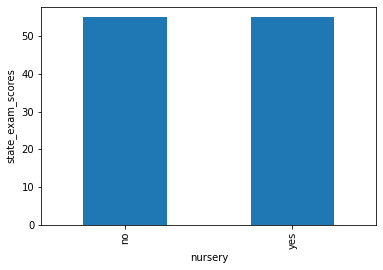

In [212]:
students_stat.groupby('nursery')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Занчения по успеваемости равны для учеников ходивших в сад и нет, одинаково. Скорее всего для анализа данный столбец не пригодиться.

# 21. Анализ данных в столбце 'studytime_granular'

In [213]:
'''
Посмотрим статистику ????????
'''
pd.DataFrame(students_stat.studytime_granular.value_counts())

,studytime_granular
-6.0,194
-3.0,102
-9.0,63
-12.0,27


In [214]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['studytime_granular']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  386 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


In [215]:
# Посмотрим уникальные значения в столбце
print(students_stat.studytime_granular.unique())

[ -6.  -9.  -3.  nan -12.]


In [217]:
students_stat.groupby(['studytime_granular'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['nursery'])['state_exam_scores'].value_counts()

studytime_granular
-12.0    56.296296
-9.0     57.741935
-6.0     50.820106
-3.0     49.558824
Name: state_exam_scores, dtype: float64

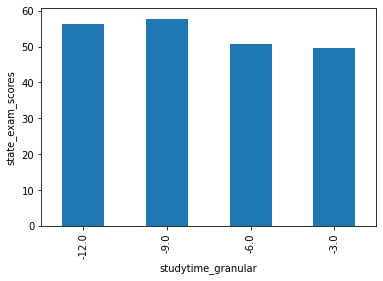

In [223]:
students_stat.groupby('studytime_granular')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

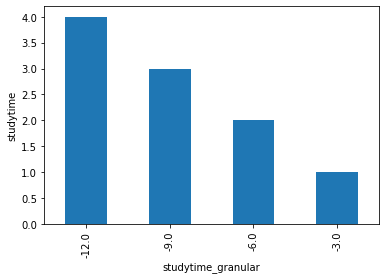

In [221]:
students_stat.groupby('studytime_granular')['study_time'].mean().plot(kind='bar')
plt.ylabel('studytime') # добавляем подпись на оси Оу
plt.show();

In [218]:
students_stat.corr()

,students_age,mother_education,father_education,travel_time,study_time,failures,studytime_granular,family_relationships,free_time,go_out,health_status,absences,state_exam_scores
students_age,1.000000,-0.170360,-0.146180,0.102229,0.001703,0.194763,-0.001639,0.061858,0.016778,0.116972,-0.046343,0.091385,-0.152729
mother_education,-0.170360,1.000000,0.613409,-0.157718,0.080122,-0.252793,-0.080734,-0.008479,0.023381,0.061495,-0.044080,-0.012662,0.210920
father_education,-0.146180,0.613409,1.000000,-0.153415,0.008075,-0.254052,-0.008054,-0.022816,-0.010942,0.052945,0.022646,0.023220,0.122044
travel_time,0.102229,-0.157718,-0.153415,1.000000,-0.104561,0.066393,0.105759,-0.020814,-0.002544,0.060176,-0.051640,-0.039193,-0.059898
study_time,0.001703,0.080122,0.008075,-0.104561,1.000000,-0.167658,-1.000000,0.045956,-0.114731,-0.042782,-0.087115,-0.024975,0.112063
failures,0.194763,-0.252793,-0.254052,0.066393,-0.167658,1.000000,0.169026,-0.033890,0.091085,0.105331,0.102437,0.054622,-0.345349
studytime_granular,-0.001639,-0.080734,-0.008054,0.105759,-1.000000,0.169026,1.000000,-0.046561,0.116405,0.043193,0.087776,0.025018,-0.113496
family_relationships,0.061858,-0.008479,-0.022816,-0.020814,0.045956,-0.033890,-0.046561,1.000000,0.178435,0.079618,0.082873,-0.083663,0.058011
free_time,0.016778,0.023381,-0.010942,-0.002544,-0.114731,0.091085,0.116405,0.178435,1.000000,0.291988,0.067057,0.008098,0.021309
go_out,0.116972,0.061495,0.052945,0.060176,-0.042782,0.105331,0.043193,0.079618,0.291988,1.000000,-0.006404,-0.051068,-0.127115


# 22. Анализ данных в столбце 'get_higher_education'

In [224]:
'''
Посмотрим статистику хотят ли ученики получить высшее образование (yes или no)
'''
pd.DataFrame(students_stat.get_higher_education.value_counts())

,get_higher_education
yes,355
no,18


In [225]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['get_higher_education']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   get_higher_education  373 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


In [226]:
# Посмотрим уникальные значения в столбце
print(students_stat.get_higher_education.unique())

['yes' nan 'no']


In [245]:
# В колонке есть 20 значений "NaN", заменим их на None
students_stat.get_higher_education = students_stat.get_higher_education.apply(change_nan)

# Проверим уникальеность значений в колонке после замены
print(students_stat.get_higher_education.unique())

['yes' None 'no']


In [227]:
students_stat.groupby(['get_higher_education'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['nursery'])['state_exam_scores'].value_counts()

get_higher_education
no     33.333333
yes    53.080229
Name: state_exam_scores, dtype: float64

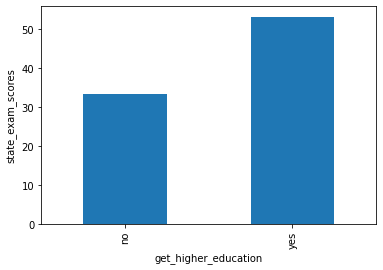

In [230]:
students_stat.groupby('get_higher_education')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

# 23. Анализ данных в столбце 'internet'

In [241]:
'''
Посмотрим статистику по наличию интернета дома (yes или no)
'''
pd.DataFrame(students_stat.internet.value_counts())

,internet
yes,303
no,56


In [238]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  359 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


In [234]:
# Посмотрим уникальные значения в столбце
print(students_stat.internet.unique())

[nan 'yes' 'no']


In [244]:
# В колонке есть 44 значения "NaN", заменим их на None
students_stat.internet = students_stat.internet.apply(change_nan)

# Проверим уникальеность значений в колонке после замены
print(students_stat.internet.unique())

[None 'yes' 'no']


In [239]:
students_stat.groupby(['internet'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['nursery'])['state_exam_scores'].value_counts()

internet
no     49.090909
yes    53.137584
Name: state_exam_scores, dtype: float64

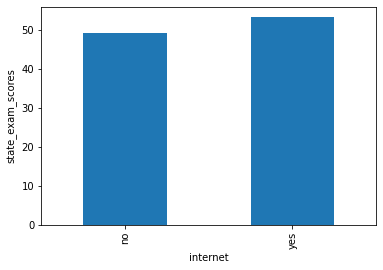

In [240]:
students_stat.groupby('internet')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

# 24. Анализ данных в столбце 'in_romantic_relationship'

In [ ]:
'''
Посмотрим статистику по наличию интернета дома (yes или no)
'''
pd.DataFrame(students_stat.internet.value_counts())

In [ ]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['internet']].info()

In [ ]:
# Посмотрим уникальные значения в столбце
print(students_stat.internet.unique())

In [ ]:
students_stat.groupby(['internet'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['nursery'])['state_exam_scores'].value_counts()

# 25. Анализ данных в столбце 'family_relationships'

In [ ]:
'''
Посмотрим статистику по наличию интернета дома (yes или no)
'''
pd.DataFrame(students_stat.internet.value_counts())

In [ ]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['internet']].info()

In [ ]:
# Посмотрим уникальные значения в столбце
print(students_stat.internet.unique())

In [ ]:
students_stat.groupby(['internet'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['nursery'])['state_exam_scores'].value_counts()

# 26. Анализ данных в столбце 'free_time'

# 27. Анализ данных в столбце 'go_out'

# 28. Анализ данных в столбце 'health_status'

# 29. Анализ данных в столбце 'absences'

# 30. Анализ данных в столбце 'state_exam_scores'